# FRE-6083 Final Project

# Convertible Bond Pricing in Different Method

- We will use underneath Parameters for Simulation

## Naive Model - Convertible Bond Pricing

In [3]:
import numpy as np
import math
from scipy.stats import norm

# Parameters
spot_price = 29.04  # Underlying stock price
conversion_price = 26.0
conversion_ratio = 3.84615
risk_free_rate = 0.04
dividend_yield = 0.02
volatility = 0.40
maturity = 18  # years until maturity
coupon_rate = 0.0575
frequency = 2  # Semiannual coupons
N_MC = 10000  # Number of Monte Carlo simulations
N_t = 365 * maturity  # Number of time steps (daily)

# Function to simulate stock price paths
def simulate_stock_paths(S0, r, q, sigma, T, N_t, N_MC):
    dt = T / N_t
    paths = np.zeros((N_t + 1, N_MC))
    paths[0] = S0
    for t in range(1, N_t + 1):
        Z = np.random.standard_normal(N_MC)
        paths[t] = paths[t - 1] * np.exp((r - q - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# Simulate stock price paths
stock_paths = simulate_stock_paths(spot_price, risk_free_rate, dividend_yield, volatility, maturity, N_t, N_MC)

# Function to calculate convertible bond value
def convertible_bond_value(paths, conversion_price, conversion_ratio, r, T, N_t, coupon_rate, frequency):
    dt = T / N_t
    coupon_payment = coupon_rate / frequency
    bond_values = np.zeros(N_MC)
    for i in range(N_MC):
        conversion_value = conversion_ratio * paths[-1, i]
        bond_value = 0
        for t in range(0, N_t, int(N_t / (T * frequency))):
            bond_value += coupon_payment * math.exp(-r * t * dt)
        bond_value += math.exp(-r * T)  # Redemption value
        bond_values[i] = max(bond_value, conversion_value)
    return np.mean(bond_values)

# Calculate convertible bond price
convertible_bond_price = convertible_bond_value(stock_paths, conversion_price, conversion_ratio, risk_free_rate, maturity, N_t, coupon_rate, frequency)
print("Convertible Bond Price: ", convertible_bond_price)


Convertible Bond Price:  159.5121829766911


Solving the Problem in the Paper:

In [4]:
import numpy as np
import math
from scipy.stats import norm

# Parameters for the given example
spot_price = 100  # Underlying stock price from the example
conversion_price = 100  # Since the conversion ratio is 1, the conversion price is equal to face value
conversion_ratio = 1  # Given in the example
risk_free_rate = 0.05  # Risk-free rate from the example
dividend_yield = 0.1  # Dividend yield from the example
volatility = 0.4  # Volatility from the example
maturity = 2  # years until maturity from the example
coupon_rate = 0.05  # Coupon rate from the example (5% of face value)
frequency = 2  # Semiannual coupons from the example
N_MC = 10000  # Number of Monte Carlo simulations
N_t = 100  # Number of time steps from the example

# Function to simulate stock price paths
def simulate_stock_paths(S0, r, q, sigma, T, N_t, N_MC):
    dt = T / N_t
    paths = np.zeros((N_t + 1, N_MC))
    paths[0] = S0
    for t in range(1, N_t + 1):
        Z = np.random.standard_normal(N_MC)
        paths[t] = paths[t - 1] * np.exp((r - q - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# Simulate stock price paths
stock_paths = simulate_stock_paths(spot_price, risk_free_rate, dividend_yield, volatility, maturity, N_t, N_MC)

# Function to calculate convertible bond value
def convertible_bond_value(paths, conversion_price, conversion_ratio, r, T, N_t, coupon_rate, frequency):
    dt = T / N_t
    coupon_payment = coupon_rate * conversion_price / frequency
    bond_values = np.zeros(N_MC)
    for i in range(N_MC):
        conversion_value = conversion_ratio * paths[-1, i]
        bond_value = 0
        for t in range(0, N_t, int(N_t / (T * frequency))):
            bond_value += coupon_payment * math.exp(-r * t * dt)
        bond_value += math.exp(-r * T) * conversion_price  # Redemption value
        bond_values[i] = max(bond_value, conversion_value)
    return np.mean(bond_values)

# Calculate convertible bond price
convertible_bond_price = convertible_bond_value(stock_paths, conversion_price, conversion_ratio, risk_free_rate, maturity, N_t, coupon_rate, frequency)
convertible_bond_price


116.82251473014166

In [5]:
# Parameters for the given example
spot_price = 100  # Underlying stock price from the example
conversion_price = 100  # Since the conversion ratio is 1, the conversion price is equal to face value
conversion_ratio = 1  # Given in the example
risk_free_rate = 0.05  # Risk-free rate from the example
dividend_yield = 0.1  # Dividend yield from the example
volatility = 0.4  # Volatility from the example
maturity = 2  # years until maturity from the example
coupon_rate = 0.05  # Coupon rate from the example (5% of face value)
frequency = 2  # Semiannual coupons from the example
N_MC = 1000  # Number of Monte Carlo simulations
N_t = 100  # Number of time steps from the example

# Black-Scholes formula for a European call option
def black_scholes(S, K, T, r, q, sigma):
    # Calculate d1 and d2 parameters
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate the price of a European call option
    call = (S * np.exp(-q * T) * norm.cdf(d1, 0.0, 1.0) -
            K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0))
    return call

# Calculate the convertible bond price using Black-Scholes formula for the call option part
convertible_bond_price_black_scholes = black_scholes(
    spot_price,
    conversion_price,
    maturity,
    risk_free_rate,
    dividend_yield,
    volatility
) * conversion_ratio

# Simulate stock price paths
stock_paths = simulate_stock_paths(spot_price, risk_free_rate, dividend_yield, volatility, maturity, N_t, N_MC)

# Function to calculate convertible bond value with Black-Scholes for conversion value
def convertible_bond_value_with_bs(paths, black_scholes_price, r, T, N_t, coupon_rate, frequency):
    dt = T / N_t
    coupon_payment = coupon_rate * conversion_price / frequency
    bond_values = np.zeros(N_MC)
    for i in range(N_MC):
        # Use Black-Scholes price for conversion value instead of simulated path
        conversion_value = black_scholes_price
        bond_value = 0
        for t in range(0, N_t, int(N_t / (T * frequency))):
            bond_value += coupon_payment * math.exp(-r * t * dt)
        bond_value += math.exp(-r * T) * conversion_price  # Redemption value
        bond_values[i] = max(bond_value, conversion_value)
    return np.mean(bond_values)

# Calculate convertible bond price with Black-Scholes for conversion value
convertible_bond_price_with_bs = convertible_bond_value_with_bs(
    stock_paths,
    convertible_bond_price_black_scholes,
    risk_free_rate,
    maturity,
    N_t,
    coupon_rate,
    frequency
)

convertible_bond_price_with_bs


100.11944886073996

In [6]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

# Parameters based on the screenshots
risk_free_rate = 0.05  # Risk-free rate
dividend_yield = 0.02  # Dividend yield
volatility = 0.4       # Volatility of the stock
S0 = 60               # Initial stock price
T = 2                  # Time to maturity in years
N_MC = 10000           # Number of Monte Carlo simulations
N_t = 100              # Number of time steps
dt = T / N_t           # Time step
K = 100                # Strike price for the conversion option

# Function to simulate stock price paths using Geometric Brownian Motion
def simulate_gbm(S0, r, q, sigma, T, N_t, N_MC):
    dt = T / N_t
    paths = np.zeros((N_MC, N_t + 1))
    paths[:, 0] = S0
    for t in range(1, N_t + 1):
        Z = np.random.standard_normal(N_MC)
        paths[:, t] = paths[:, t - 1] * np.exp((r - q - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# Simulate the stock price paths
stock_paths = simulate_gbm(S0, risk_free_rate, dividend_yield, volatility, T, N_t, N_MC)

# Function to calculate the payoff of the convertible bond at maturity
def payoff_at_maturity(paths, K):
    return np.maximum(paths[:, -1] - K, 0)  # Convertible bond conversion payoff

# LSMC algorithm for American option pricing
def LSMC(paths, K, r, dt):
    N_MC, N_t = paths.shape
    exercise_values = payoff_at_maturity(paths, K)
    values = np.zeros_like(paths)
    values[:, -1] = exercise_values
    regression = LinearRegression()

    # Backward induction for the LSMC algorithm
    for t in reversed(range(N_t - 1)):
        in_the_money = paths[:, t] > K
        if np.any(in_the_money):
            X = paths[in_the_money, t].reshape(-1, 1)
            Y = values[in_the_money, t + 1] * np.exp(-r * dt)
            regression.fit(X, Y)
            continuation_values = regression.predict(X)
            # Early exercise decision
            exercise = np.maximum(paths[in_the_money, t] - K, 0)
            values[in_the_money, t] = np.where(exercise > continuation_values, exercise, Y)
        values[:, t] = values[:, t + 1] * np.exp(-r * dt)  # Discounting the values

    # Average the discounted payoff at t=0 to get the option price
    option_price = np.mean(values[:, 0])
    return option_price + K

# Calculate the price of the convertible bond using LSMC
convertible_bond_price = LSMC(stock_paths, K, risk_free_rate, dt)

print(f"The estimated price of the convertible bond using LSMC is: {convertible_bond_price:.2f}")


The estimated price of the convertible bond using LSMC is: 104.54


Limitations and Considerations:
- This is a simplified model and may not accurately capture all the complexities and features of real-world convertible bonds.
- The model does not include callable and puttable features. Implementing these would require additional logic to determine optimal exercise strategies.
- The accuracy of the model depends on the chosen parameters and the number of simulations. More simulations generally lead to more accurate results but require more computational resources.
- For real-world applications, it's crucial to validate and calibrate the model against market data and known benchmarks.

## Convertible Bond Pricing w/ Call/Put Features

In [7]:
import numpy as np
import math

# Parameters
spot_price = 29.04  # Underlying stock price
conversion_price = 26.0
conversion_ratio = 3.84615
risk_free_rate = 0.04
dividend_yield = 0.02
volatility = 0.40
maturity = 18  # years until maturity
coupon_rate = 0.0575
frequency = 2  # Semiannual coupons
N_MC = 10000  # Number of Monte Carlo simulations
N_t = 365 * maturity  # Number of time steps (daily)

# Callable and puttable features
call_dates = [7, 12, 17]  # Years when the bond can be called
put_dates = [7, 12, 17]   # Years when the bond can be put
call_price = 100.0        # Call price
put_price = 100.0         # Put price

# Function to simulate stock price paths
def simulate_stock_paths(S0, r, q, sigma, T, N_t, N_MC):
    dt = T / N_t
    paths = np.zeros((N_t + 1, N_MC))
    paths[0] = S0
    for t in range(1, N_t + 1):
        Z = np.random.standard_normal(N_MC)
        paths[t] = paths[t - 1] * np.exp((r - q - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# Simulate stock price paths
stock_paths = simulate_stock_paths(spot_price, risk_free_rate, dividend_yield, volatility, maturity, N_t, N_MC)

# Function to calculate convertible bond value with callable and puttable features
def convertible_bond_value_with_options(paths, conversion_price, conversion_ratio, r, T, N_t, coupon_rate, frequency, call_dates, put_dates, call_price, put_price):
    dt = T / N_t
    coupon_payment = coupon_rate / frequency
    bond_values = np.zeros(N_MC)
    for i in range(N_MC):
        bond_value = 0
        for t in range(0, N_t, int(N_t / (T * frequency))):
            time_in_years = t * dt
            stock_price = paths[t, i]
            conversion_value = conversion_ratio * stock_price
            bond_value += coupon_payment * math.exp(-r * time_in_years)
            # Check for call and put options
            if time_in_years in call_dates and bond_value > call_price:
                bond_value = call_price
                break
            if time_in_years in put_dates and bond_value < put_price:
                bond_value = put_price
                break
        bond_value += math.exp(-r * T)  # Redemption value
        bond_values[i] = max(bond_value, conversion_value)
    return np.mean(bond_values)

# Calculate convertible bond price with callable and puttable features
convertible_bond_price_with_options = convertible_bond_value_with_options(stock_paths, conversion_price, conversion_ratio, risk_free_rate, maturity, N_t, coupon_rate, frequency, call_dates, put_dates, call_price, put_price)
print("Convertible Bond Price with Callable and Puttable Features: ", convertible_bond_price_with_options)


Convertible Bond Price with Callable and Puttable Features:  156.96541879536994


Limitations and Considerations:
- This model assumes that the decision to call or put the bond is made only on coupon payment dates. In reality, this decision could be made on any business day.
- The model uses a simplified approach to determine the call and put actions. More sophisticated models might use a dynamic programming approach to optimize the decision at each step.
- As with any model, it's important to validate and calibrate it against market data and known benchmarks for accuracy.

## Implementation with Black's Formula

Define the Black's formula for a call option:

In [8]:
from scipy.stats import norm

def blacks_formula(S, K, T, r, sigma, q=0):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * math.exp(-q * T) * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

Modify the convertible bond valuation function to include the call option value estimated using Black's formula:

In [9]:
def convertible_bond_value_with_options_and_black(paths, conversion_price, conversion_ratio, r, T, N_t, coupon_rate, frequency, call_dates, put_dates, call_price, put_price, sigma):
    dt = T / N_t
    coupon_payment = coupon_rate / frequency
    bond_values = np.zeros(N_MC)
    for i in range(N_MC):
        bond_value = 0
        for t in range(0, N_t, int(N_t / (T * frequency))):
            time_in_years = t * dt
            stock_price = paths[t, i]
            conversion_value = conversion_ratio * stock_price
            bond_value += coupon_payment * math.exp(-r * time_in_years)
            # Check for call and put options
            if time_in_years in call_dates and bond_value > call_price:
                bond_value = call_price
                break
            if time_in_years in put_dates and bond_value < put_price:
                bond_value = put_price
                break
        bond_value += math.exp(-r * T)  # Redemption value
        # Calculate the call option value using Black's formula
        call_option_value = blacks_formula(stock_price, conversion_price, T - time_in_years, r, sigma)
        bond_values[i] = max(bond_value, conversion_value, call_option_value)
    return np.mean(bond_values)

In [10]:
convertible_bond_price_with_black = convertible_bond_value_with_options_and_black(stock_paths, conversion_price, conversion_ratio, risk_free_rate, maturity, N_t, coupon_rate, frequency, call_dates, put_dates, call_price, put_price, volatility)
print("Convertible Bond Price with Callable, Puttable Features, and Black's Formula: ", convertible_bond_price_with_black)

Convertible Bond Price with Callable, Puttable Features, and Black's Formula:  156.96541879536994


Notes:
- This approach uses Black's formula to estimate the value of the call option at each time step and compares it with the bond's redemption value and conversion value.
- The final bond value at each path is the maximum of the bond value, conversion value, and the call option value.
- This model still simplifies many aspects of a real-world convertible bond and may not fully capture all market dynamics and risks.

Limitations:
- Black's formula is designed for European options and may not be entirely appropriate for American-style options or other features typical in convertible bonds.
- The integration of Black's formula does not consider the interaction between the bond's other features (like convertibility) and the option component.
- For accurate and comprehensive pricing, a more sophisticated model that can handle the complexities of convertible bonds is recommended.

# Binomial Tree Model for Convertible Bond with American Option

In [11]:
import numpy as np

# Parameters
spot_price = 29.04  # Underlying stock price
conversion_price = 26.0
conversion_ratio = 3.84615
risk_free_rate = 0.04
dividend_yield = 0.02
volatility = 0.40
maturity = 18  # years until maturity
coupon_rate = 0.0575
frequency = 2  # Semiannual coupons
N = int(maturity * frequency)  # Number of steps in the binomial tree

# Binomial tree parameters
dt = maturity / N  # Time step
u = np.exp(volatility * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor
p = (np.exp((risk_free_rate - dividend_yield) * dt) - d) / (u - d)  # Risk-neutral probability

# Function to create a binomial price tree
def create_binomial_tree(N, S0, u, d):
    tree = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            tree[j, i] = S0 * (u ** j) * (d ** (i - j))
    return tree

# Function to calculate convertible bond value using binomial tree
def convertible_bond_binomial_tree(N, S0, conversion_price, conversion_ratio, r, dt, coupon_rate, frequency, u, d, p):
    tree = create_binomial_tree(N, S0, u, d)
    bond_values = np.zeros((N + 1, N + 1))
    coupon_payment = coupon_rate / frequency

    # Calculate bond value at maturity
    for i in range(N + 1):
        stock_price = tree[i, N]
        conversion_value = conversion_ratio * stock_price
        bond_values[i, N] = max(conversion_value, conversion_price)

    # Backward induction to determine optimal conversion strategy
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            stock_price = tree[i, j]
            conversion_value = conversion_ratio * stock_price
            hold_value = np.exp(-r * dt) * (p * bond_values[i + 1, j + 1] + (1 - p) * bond_values[i, j + 1])
            bond_values[i, j] = max(conversion_value, hold_value + coupon_payment)

    return bond_values[0, 0]

# Calculate convertible bond price using binomial tree
convertible_bond_price_binomial = convertible_bond_binomial_tree(N, spot_price, conversion_price, conversion_ratio, risk_free_rate, dt, coupon_rate, frequency, u, d, p)
print("Convertible Bond Price (Binomial Tree):", convertible_bond_price_binomial)


Convertible Bond Price (Binomial Tree): 111.692196


Notes:

- Discrete vs. Continuous Models:
The binomial tree is a discrete model, breaking the time to maturity into a series of intervals. This can lead to less precision compared to continuous models, especially if the number of steps in the tree is not sufficiently large.
Monte Carlo simulations, on the other hand, can capture more continuous paths of stock prices, potentially leading to a more accurate representation of the stock's volatility and its impact on the bond's value.

In [12]:
# Black's formula for a call option
def blacks_formula(S, K, T, r, sigma, q=0):
    if T <= 0:  # Handle the case when time to maturity is zero
        return max(S - K, 0)
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * math.exp(-q * T) * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to create a binomial price tree
def create_binomial_tree(N, S0, u, d):
    tree = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            tree[j, i] = S0 * (u ** j) * (d ** (i - j))
    return tree

# Function to calculate convertible bond value using binomial tree and Black's formula
def convertible_bond_binomial_tree_with_black(N, S0, conversion_price, conversion_ratio, r, dt, coupon_rate, frequency, u, d, p, sigma):
    tree = create_binomial_tree(N, S0, u, d)
    bond_values = np.zeros((N + 1, N + 1))
    coupon_payment = coupon_rate / frequency

    for i in range(N + 1):
        stock_price = tree[i, N]
        conversion_value = conversion_ratio * stock_price
        time_to_maturity = max(dt * (N - i), 0)
        call_option_value = blacks_formula(stock_price, conversion_price, time_to_maturity, r, sigma)
        bond_values[i, N] = max(conversion_value, call_option_value)

    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            stock_price = tree[i, j]
            conversion_value = conversion_ratio * stock_price
            time_to_maturity = max(dt * (N - j), 0)
            call_option_value = blacks_formula(stock_price, conversion_price, time_to_maturity, r, sigma)
            hold_value = np.exp(-r * dt) * (p * bond_values[i + 1, j + 1] + (1 - p) * bond_values[i, j + 1])
            bond_values[i, j] = max(conversion_value, hold_value + coupon_payment, call_option_value)

    return bond_values[0, 0]

# Calculate convertible bond price using binomial tree and Black's formula
convertible_bond_price_with_black = convertible_bond_binomial_tree_with_black(N, spot_price, conversion_price, conversion_ratio, risk_free_rate, dt, coupon_rate, frequency, u, d, p, volatility)
print("Convertible Bond Price (Binomial Tree with Black's Formula):", convertible_bond_price_with_black)


Convertible Bond Price (Binomial Tree with Black's Formula): 111.692196


Explanation:
- This code simulates the underlying stock price using a binomial tree.
- Black's formula is used to estimate the value of the call option at each node in the binomial tree.
- The convertible bond value is calculated using backward induction, considering the conversion value, the value of holding the bond, and the call option value at each node.
- The final bond price is the value at the root of the tree.

In [13]:
class ConvertibleBondMC:
    def __init__(self, S0, par_value, coupon_rate, T, M, r, sigma, conversion_ratio, simulations):
        self.S0 = S0
        self.par_value = par_value
        self.coupon_rate = coupon_rate
        self.T = T
        self.M = M
        self.r = r
        self.sigma = sigma
        self.conversion_ratio = conversion_ratio
        self.simulations = simulations
        self.dt = T / M
        self.discount_factor = np.exp(-r * T)

    def generate_stock_paths(self):
        """
        Generate stock price paths using Geometric Brownian Motion.
        Adapted from the provided C++ code.
        """
        paths = np.zeros((self.simulations, self.M + 1))
        paths[:, 0] = self.S0
        for t in range(1, self.M + 1):
            Z = np.random.normal(0, 1, self.simulations)
            paths[:, t] = paths[:, t - 1] * np.exp((self.r - 0.5 * self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * Z)
        return paths

    def payoff(self, stock_paths):
        """
        Calculate the payoff of the convertible bond at each time step.
        """
        final_stock_prices = stock_paths[:, -1]
        conversion_values = np.maximum(final_stock_prices * self.conversion_ratio - self.par_value, 0)
        bond_values = self.par_value * (1 + self.coupon_rate * self.T)
        return np.maximum(conversion_values, bond_values)

    def value(self):
        """
        Calculate the present value of the convertible bond using Monte Carlo simulation.
        Adapted from the provided C++ PathDepOption::PriceByMC function.
        """
        stock_paths = self.generate_stock_paths()
        payoff_values = self.payoff(stock_paths)
        mean_payoff = np.mean(payoff_values)
        return mean_payoff * self.discount_factor


    def black_scholes_call(self, S, K, T, r, sigma):
        """
        Black-Scholes formula to value a call option.
        """
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        call_value = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        return call_value

    def value_with_BlackScholes(self):
        """
        Calculate the value of the convertible bond using the Black-Scholes formula for the conversion feature.
        """
        conversion_value = self.black_scholes_call(self.S0, self.par_value / self.conversion_ratio, self.T, self.r, self.sigma)
        bond_value = self.par_value * (1 + self.coupon_rate * self.T) * self.discount_factor
        return max(conversion_value, bond_value)

    def value_with_BinomialTree(self, steps):
        """
        Calculate the value of the convertible bond using a binomial tree model.
        """
        # Set up binomial tree parameters
        dt = self.T / steps
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)

        # Initialize stock price tree
        stock_price_tree = np.zeros((steps + 1, steps + 1))
        for i in range(steps + 1):
            for j in range(i + 1):
                stock_price_tree[j, i] = self.S0 * (u ** j) * (d ** (i - j))

        # Initialize convertible bond value tree
        bond_value_tree = np.zeros_like(stock_price_tree)

        # Calculate bond value at maturity for each node
        for i in range(steps + 1):
            conversion_value = max(self.par_value, stock_price_tree[i, steps] * self.conversion_ratio)
            bond_value_tree[i, steps] = conversion_value

        # Backward induction for bond value
        for i in range(steps - 1, -1, -1):
            for j in range(i + 1):
                conversion_value = stock_price_tree[j, i] * self.conversion_ratio
                hold_value = (p * bond_value_tree[j + 1, i + 1] + (1 - p) * bond_value_tree[j, i + 1]) * np.exp(-self.r * dt)
                bond_value_tree[j, i] = max(conversion_value, hold_value)

        return bond_value_tree[0, 0]

    def value_with_BinomialTree_Snell(self, steps):
        """
        Calculate the value of the convertible bond using a binomial tree with Snell's method.
        """
        # Set up binomial tree parameters
        dt = self.T / steps
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)

        # Initialize stock price tree
        stock_price_tree = np.zeros((steps + 1, steps + 1))
        for i in range(steps + 1):
            for j in range(i + 1):
                stock_price_tree[j, i] = self.S0 * (u ** j) * (d ** (i - j))

        # Initialize convertible bond value tree
        bond_value_tree = np.zeros_like(stock_price_tree)

        # Calculate bond value at maturity for each node
        for i in range(steps + 1):
            bond_value_tree[i, steps] = max(self.par_value, stock_price_tree[i, steps] * self.conversion_ratio)

        # Backward induction using Snell's method
        for n in range(steps - 1, -1, -1):
            for i in range(n + 1):
                continuation_value = (p * bond_value_tree[i + 1, n + 1] + (1 - p) * bond_value_tree[i, n + 1]) / np.exp(self.r * dt)
                conversion_value = stock_price_tree[i, n] * self.conversion_ratio
                bond_value_tree[i, n] = max(conversion_value, continuation_value)

        return bond_value_tree[0, 0]

    def value_with_BinomialTree_CRR(self, steps):
        """
        Calculate the value of the convertible bond using a binomial tree with the CRR method.
        """
        # Set up binomial tree parameters
        dt = self.T / steps
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)

        # Initialize stock price tree
        stock_price_tree = np.zeros((steps + 1, steps + 1))
        for i in range(steps + 1):
            for j in range(i + 1):
                stock_price_tree[j, i] = self.S0 * (u ** j) * (d ** (i - j))

        # Initialize convertible bond value tree
        bond_value_tree = np.zeros_like(stock_price_tree)

        # Calculate bond value at maturity for each node
        for i in range(steps + 1):
            bond_value_tree[i, steps] = max(self.par_value, stock_price_tree[i, steps] * self.conversion_ratio)

        # Backward induction using CRR method
        for n in range(steps - 1, -1, -1):
            for i in range(n + 1):
                bond_value_tree[i, n] = (p * bond_value_tree[i + 1, n + 1] + (1 - p) * bond_value_tree[i, n + 1]) / np.exp(self.r * dt)

        return bond_value_tree[0, 0]


In [14]:
# Example usage with new parameters
cb = ConvertibleBondMC(S0=50,             # Initial stock price
                       par_value=100,     # Par value of the bond
                       coupon_rate=0.05,  # Annual coupon rate
                       T=0.75,            # Time to maturity in years
                       M=100,             # Number of time steps for Monte Carlo
                       r=0.05,            # Risk-free interest rate
                       sigma=0.3,         # Volatility of the underlying stock
                       conversion_ratio=2,# Conversion ratio
                       simulations=10000) # Number of simulation paths

print("Convertible Bond Value (Monte Carlo):", cb.value())
print("Convertible Bond Value (Black-Scholes):", cb.value_with_BlackScholes())
print("Convertible Bond Value (Binomial Tree):", cb.value_with_BinomialTree(steps=10))
print("Convertible Bond Value (Binomial Tree w/ Snell):", cb.value_with_BinomialTree_Snell(steps=10))
print("Convertible Bond Value (Binomial Tree w/ CRR):", cb.value_with_BinomialTree_CRR(steps=10))

Convertible Bond Value (Monte Carlo): 99.9825545875815
Convertible Bond Value (Black-Scholes): 99.93142083853527
Convertible Bond Value (Binomial Tree): 108.15757908447003
Convertible Bond Value (Binomial Tree w/ Snell): 108.15757908447014
Convertible Bond Value (Binomial Tree w/ CRR): 108.15757908447014


In [15]:
# Scenario 1: Low volatility, shorter maturity
cb1 = ConvertibleBondMC(S0=50, par_value=100, coupon_rate=0.05, T=1, M=100, r=0.02, sigma=0.2, conversion_ratio=1.5, simulations=10000)
print("Scenario 1 - Binomial Tree:", cb1.value_with_BinomialTree(steps=50))
print("Scenario 1 - Binomial Tree Snell:", cb1.value_with_BinomialTree_Snell(steps=50))
print("Scenario 1 - Binomial Tree CRR:", cb1.value_with_BinomialTree_CRR(steps=50))

# Scenario 2: High volatility, longer maturity
cb2 = ConvertibleBondMC(S0=60, par_value=100, coupon_rate=0.07, T=5, M=100, r=0.05, sigma=0.4, conversion_ratio=2, simulations=10000)
print("Scenario 2 - Binomial Tree:", cb2.value_with_BinomialTree(steps=100))
print("Scenario 2 - Binomial Tree Snell:", cb2.value_with_BinomialTree_Snell(steps=100))
print("Scenario 2 - Binomial Tree CRR:", cb2.value_with_BinomialTree_CRR(steps=100))

# Scenario 3: Medium volatility, medium maturity
cb3 = ConvertibleBondMC(S0=40, par_value=100, coupon_rate=0.03, T=3, M=100, r=0.08, sigma=0.3, conversion_ratio=2.5, simulations=10000)
print("Scenario 3 - Binomial Tree:", cb3.value_with_BinomialTree(steps=200))
print("Scenario 3 - Binomial Tree Snell:", cb3.value_with_BinomialTree_Snell(steps=200))
print("Scenario 3 - Binomial Tree CRR:", cb3.value_with_BinomialTree_CRR(steps=200))

Scenario 1 - Binomial Tree: 98.71915379533495
Scenario 1 - Binomial Tree Snell: 98.71915379533444
Scenario 1 - Binomial Tree CRR: 98.71915379533444
Scenario 2 - Binomial Tree: 136.62520908539153
Scenario 2 - Binomial Tree Snell: 136.62520908539085
Scenario 2 - Binomial Tree CRR: 136.6252090853908
Scenario 3 - Binomial Tree: 109.4838758089561
Scenario 3 - Binomial Tree Snell: 109.4838758089567
Scenario 3 - Binomial Tree CRR: 109.48387580895667


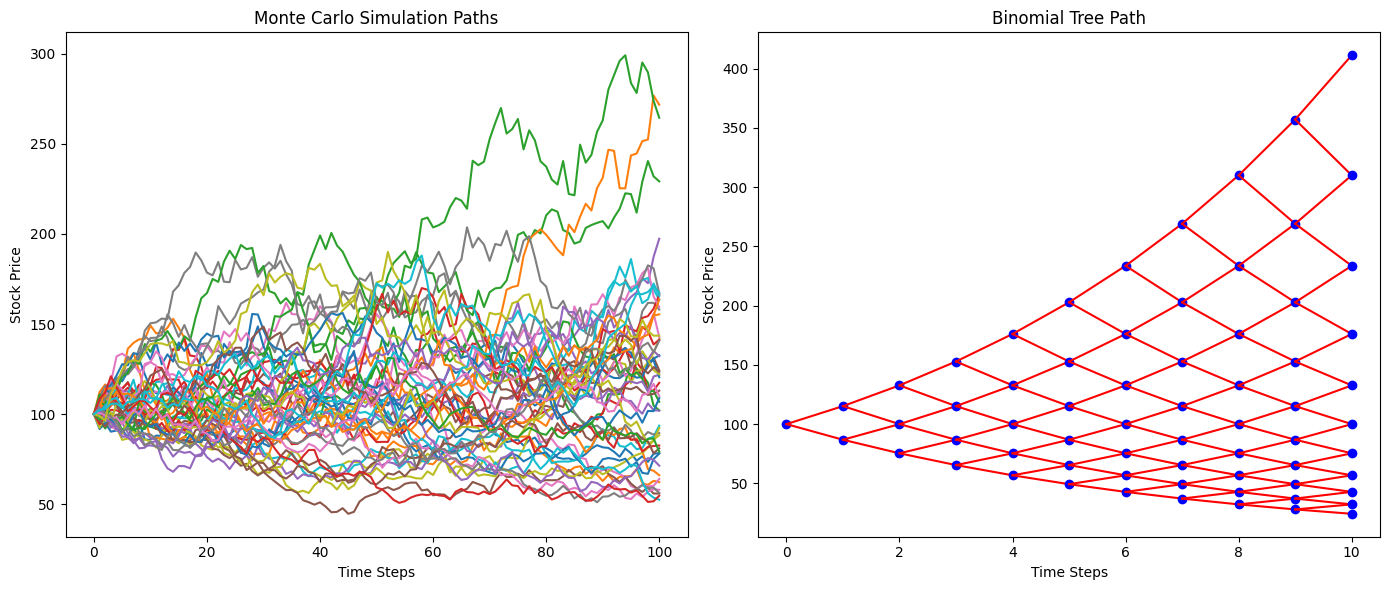

In [16]:
import matplotlib.pyplot as plt

def plot_simulation_paths(cb, steps, num_paths=50):
    # Monte Carlo Simulation Paths
    mc_paths = cb.generate_stock_paths()
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    for i in range(min(num_paths, cb.simulations)):
        plt.plot(mc_paths[i, :], label=f'Path {i+1}' if i < 5 else None)
    plt.title('Monte Carlo Simulation Paths')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')

    # Binomial Tree Paths
    plt.subplot(1, 2, 2)
    dt = cb.T / steps
    u = np.exp(cb.sigma * np.sqrt(dt))
    d = 1 / u

    for i in range(steps + 1):
        for j in range(i + 1):
            stock_price = cb.S0 * (u ** j) * (d ** (i - j))
            plt.plot(i, stock_price, 'bo')
            if i != steps:  # Connect nodes with lines
                plt.plot([i, i+1], [stock_price, stock_price*u], 'r-')
                plt.plot([i, i+1], [stock_price, stock_price*d], 'r-')

    plt.title('Binomial Tree Path')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')

    plt.tight_layout()
    plt.show()

# Example usage
cb = ConvertibleBondMC(S0=100, par_value=1000, coupon_rate=0.05, T=5, M=100, r=0.05, sigma=0.2, conversion_ratio=10, simulations=1000)
plot_simulation_paths(cb, steps=10)


Price by CRR (Cox-Ross-Rubinstein):

-  The CRR method is a standard approach to valuing options using a binomial tree.
- It calculates the option's value based on the expectation of its future payoff, discounted back to the present.
- The CRR model is typically used for European-style options, where exercise is only allowed at maturity.
- When used for American-style options or convertible bonds, the CRR method does not explicitly consider the possibility of early exercise at each node. If implemented for American options, it would require additional logic to handle early exercise.

Price by Snell (Using Snell's Envelope):

- The Snell's Envelope method is an enhancement of the binomial tree approach specifically designed to handle American-style options or similar instruments with early exercise features.
- At each node, it calculates two values: the continuation value (the value of holding the option and moving to the next time step) and the immediate exercise value.
- The Snell's Envelope method then chooses the higher of these two values at each node, effectively considering the optimal exercise strategy at every step.
- This method is particularly useful for convertible bonds, which often have features that allow for early conversion.

while the CRR method is a fundamental approach to option pricing using binomial trees, the Snell's Envelope method provides an extension to handle early exercise decisions, making it more suitable for American-style options or convertible bonds with early exercise provisions.

In [17]:
import math

E = math.e

class Tree_convertible_bond:
    def __init__(self, r, sigma, S_0, T, lbd, conversion_ratio, callback_price, par_value, recycle_ratio, steps):
        self.r = r
        self.sigma = sigma
        self.S_0 = S_0
        self.T = T
        self.lbd = lbd
        self.conversion_ratio = conversion_ratio
        self.callback_price = callback_price
        self.par_value = par_value
        self.recycle_ratio = recycle_ratio
        self.steps = steps

        self.dt = self.T/self.steps
        self.u = E**(((self.sigma*self.sigma-self.lbd)*self.dt)**0.5)
        self.d = 1/self.u
        self.p_u = (E**(self.r*self.dt)-self.d*E**(-self.lbd*self.dt))/(self.u-self.d)
        self.p_d = (self.u*E**(-self.lbd*self.dt)-E**(self.r*self.dt))/(self.u-self.d)
        self.p_default = 1-self.p_u-self.p_d

        self.bond_price = None

        self.tree = None

        self.build_tree()

    def build_tree(self):
        self.tree = list()
        for lvl in range(self.steps+1):
            row = list()
            for j in range(lvl+1):
                node = dict()
                node["S"] = self.S_0*(self.u**j)*(self.d**(lvl-j))
                node["B"] = None
                row.append(node)
            self.tree.append(row)
        return

    def calculate_bond_price(self):
        tree = self.tree
        r, steps = self.r, self.steps
        conversion_ratio, callback_price = self.conversion_ratio, self.callback_price
        recycle_ratio, par_value = self.recycle_ratio, self.par_value

        dt, u, d = self.dt, self.u, self.d
        p_u, p_d, p_default = self.p_u, self.p_d, self.p_default

        # Discount factor.
        a = E**(-r*dt)

        # Boundary condition.
        for node in tree[-1]:
            node["B"] = max(node["S"]*conversion_ratio, par_value)

        # Iteratively calculate back to root node.
        for lvl in range(steps-1, -1, -1):
            for j in range(lvl+1):
                tree[lvl][j]["B"] = a*p_u*tree[lvl+1][j+1]["B"]+a*p_d*tree[lvl+1][j]["B"]
                tree[lvl][j]["B"] += a*p_default*par_value*recycle_ratio
                tree[lvl][j]["B"] = max(min(tree[lvl][j]["B"], callback_price), tree[lvl][j]["S"]*conversion_ratio)

        self.bond_price = tree[0][0]["B"]

        return



In [18]:
tree_obj = Tree_convertible_bond(0.05, 0.3, 50, 0.75, 0.01, 2, 113, 100, 0.4, 10)
tree_obj.calculate_bond_price()
bond_price = tree_obj.bond_price

print("r: 0.05,  sigma: 0.3,  S_0: 50,  T: 0.75,  lambda: 0.01,  conversion_ratio: 2,\n")
print("callback_price: 113,  par_value: 100,  recycle_ratio: 0.4,  steps: 10 . \n\n")
print("可转换债券价格为：", bond_price)

r: 0.05,  sigma: 0.3,  S_0: 50,  T: 0.75,  lambda: 0.01,  conversion_ratio: 2,

callback_price: 113,  par_value: 100,  recycle_ratio: 0.4,  steps: 10 . 


可转换债券价格为： 106.61156436861458


# Final Model Class

## Final Model (Explain in Slides)

### Monte Carlo Model && Black Scholes Approach

In [47]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

class ConvertibleBondMonteCarlo:
    def __init__(self, S0, par_value, coupon_rate, T, M, r, sigma, conversion_ratio, simulations):
        self.S0 = S0
        self.par_value = par_value
        self.coupon_rate = coupon_rate
        self.T = T
        self.M = M
        self.r = r
        self.sigma = sigma
        self.conversion_ratio = conversion_ratio
        self.simulations = simulations
        self.dt = T / M
        self.discount_factor = np.exp(-r * T)

    def generate_stock_paths(self):
        """
        Generate stock price paths using Geometric Brownian Motion.
        """
        paths = np.zeros((self.simulations, self.M + 1))
        paths[:, 0] = self.S0
        for t in range(1, self.M + 1):
            Z = np.random.normal(0, 1, self.simulations)
            paths[:, t] = paths[:, t - 1] * np.exp((self.r - 0.5 * self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * Z)
        return paths

    def payoff(self, stock_paths):
        """
        Calculate the payoff of the convertible bond at each time step.
        """
        final_stock_prices = stock_paths[:, -1]
        conversion_values = np.maximum(final_stock_prices * self.conversion_ratio - self.par_value, 0)
        bond_values = self.par_value * (1 + self.coupon_rate) ** self.T
        return np.maximum(conversion_values, bond_values)

    def value(self): # Price w/ Monte Carlo
        """
        Calculate the present value of the convertible bond using Monte Carlo simulation.
        """
        stock_paths = self.generate_stock_paths()
        payoff_values = self.payoff(stock_paths)
        mean_payoff = np.mean(payoff_values)
        return mean_payoff * self.discount_factor

    def black_scholes_price(self): # Price w/ BS Formula
        # Time to maturity
        T = self.T
        # Current stock price is S0
        S = self.S0
        # Strike price K is par_value / conversion_ratio
        K = self.par_value / self.conversion_ratio

        d1 = (np.log(S / K) + (self.r + 0.5 * self.sigma**2) * T) / (self.sigma * np.sqrt(T))
        d2 = d1 - self.sigma * np.sqrt(T)

        call_value = S * norm.cdf(d1) - K * np.exp(-self.r * T) * norm.cdf(d2)

        # The value of the convertible bond is the value of the call option plus the present value of the bond's face value
        bond_value = self.par_value * self.discount_factor
        return call_value * self.conversion_ratio + bond_value

### Monte Carlo Convergence Test

Convergence reached at 6000 simulations with a relative change of 0.07%.


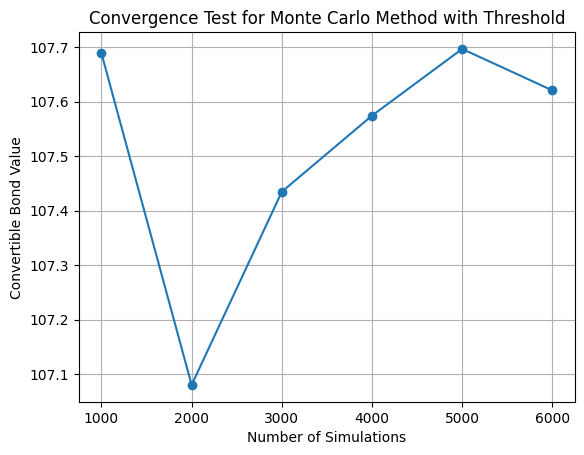

In [51]:
# Create instances of the Monte Carlo and Binomial Tree models
cb_monte_carlo = ConvertibleBondMonteCarlo(S0, par_value, coupon_rate, T, M, r, sigma, conversion_ratio, simulations)

def test_convergence_monte_carlo_with_threshold(model, initial_sims, increment, iterations, threshold=0.001):
    values = []
    sims = initial_sims
    convergence_reached = False
    for i in range(iterations):
        model.simulations = sims
        value = model.value()
        values.append(value)

        # Check for convergence if we have more than one value (to compare)
        if i > 0:
            relative_change = abs(values[i] - values[i-1]) / values[i-1]
            if relative_change < threshold:
                convergence_reached = True
                print(f"Convergence reached at {sims} simulations with a relative change of {relative_change:.2%}.")
                break

        sims += increment

    # If convergence is not reached, print a message
    if not convergence_reached:
        print(f"Convergence not reached after {sims-increment} simulations.")

    return values, convergence_reached

# Run the convergence test with threshold for the Monte Carlo method
convergence_values, convergence_reached = test_convergence_monte_carlo_with_threshold(
    cb_monte_carlo, initial_simulations, increment, iterations, threshold=0.001
)

# Plot the convergence results
simulations_range = range(initial_simulations, initial_simulations + increment * (len(convergence_values)), increment)
plt.plot(simulations_range, convergence_values, marker='o')
plt.xlabel('Number of Simulations')
plt.ylabel('Convertible Bond Value')
plt.title('Convergence Test for Monte Carlo Method with Threshold')
plt.grid(True)
plt.show()

### Binomial Tree Model (Standard, CRR, Snell) w/ Convergence Test

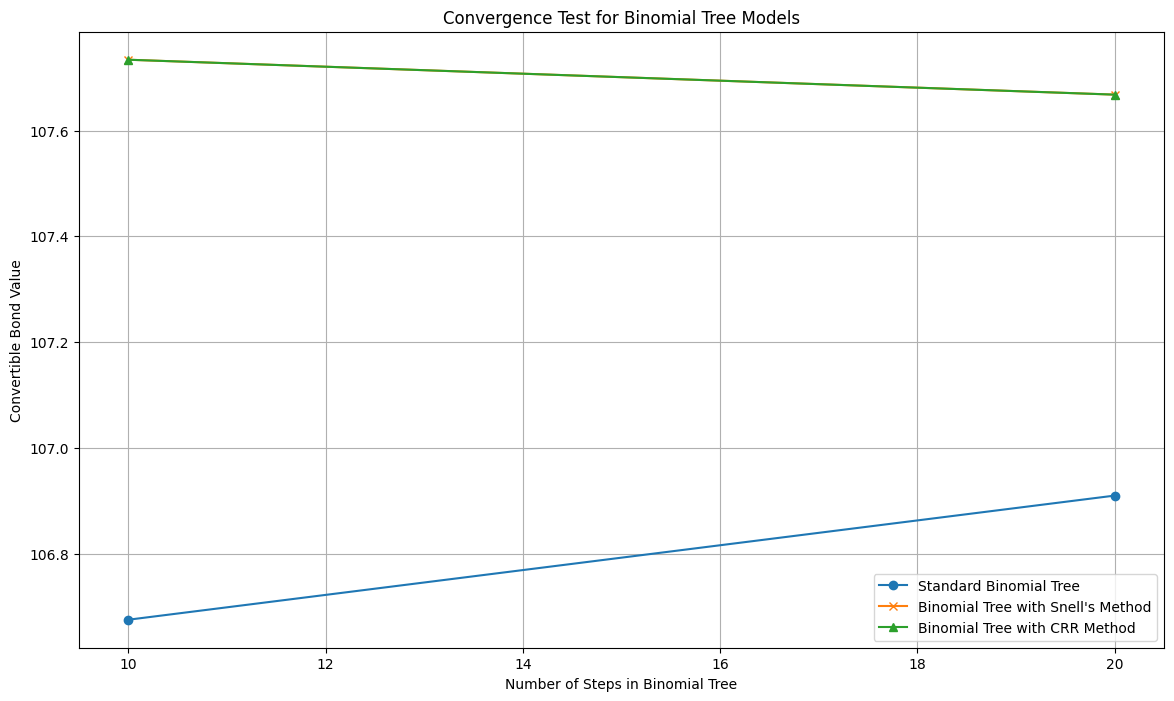

Standard Binomial Tree Convergence reached at: 20 steps
Binomial Tree with Snell's Method Convergence reached at: 20 steps
Binomial Tree with CRR Method Convergence reached at: 20 steps


In [49]:
import numpy as np

class ConvertibleBondBinomialTree:
    def __init__(self, S0, par_value, coupon_rate, T, r, sigma, conversion_ratio, steps):
        self.S0 = S0
        self.par_value = par_value
        self.coupon_rate = coupon_rate
        self.T = T
        self.r = r
        self.sigma = sigma
        self.conversion_ratio = conversion_ratio
        self.steps = steps
        self.dt = T / steps

    def value_with_BinomialTree(self): # Price w/ Binomial Tree - Euler Scheme
        dt = self.T / self.steps
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)
        stock_price_tree = np.zeros((self.steps + 1, self.steps + 1))

        for i in range(self.steps + 1):
            for j in range(i + 1):
                stock_price_tree[j, i] = self.S0 * (u ** j) * (d ** (i - j))

        bond_value_tree = np.zeros_like(stock_price_tree)

        for i in range(self.steps + 1):
            conversion_value = np.maximum(stock_price_tree[i, self.steps] * self.conversion_ratio - self.par_value, 0)
            bond_value_tree[i, self.steps] = np.maximum(conversion_value, self.par_value)

        for i in range(self.steps - 1, -1, -1):
            for j in range(i + 1):
                conversion_value = stock_price_tree[j, i] * self.conversion_ratio
                hold_value = (p * bond_value_tree[j + 1, i + 1] + (1 - p) * bond_value_tree[j, i + 1]) * np.exp(-self.r * dt)
                bond_value_tree[j, i] = np.maximum(conversion_value, hold_value)

        return bond_value_tree[0, 0]

    def value_with_BinomialTree_Snell(self): # Price w/ Snell Envelope
        dt = self.T / self.steps
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)

        stock_price_tree = np.zeros((self.steps + 1, self.steps + 1))

        for i in range(self.steps + 1):
            for j in range(i + 1):
                stock_price_tree[j, i] = self.S0 * (u ** j) * (d ** (i - j))

        bond_value_tree = np.zeros_like(stock_price_tree)

        for i in range(self.steps + 1):
            bond_value_tree[i, self.steps] = np.maximum(stock_price_tree[i, self.steps] * self.conversion_ratio, self.par_value)

        for n in range(self.steps - 1, -1, -1):
            for i in range(n + 1):
                continuation_value = (p * bond_value_tree[i + 1, n + 1] + (1 - p) * bond_value_tree[i, n + 1]) * np.exp(-self.r * dt)
                conversion_value = stock_price_tree[i, n] * self.conversion_ratio
                bond_value_tree[i, n] = np.maximum(conversion_value, continuation_value)

        return bond_value_tree[0, 0]

    def value_with_BinomialTree_CRR(self): # Price w/ Cox-Ross-Rubinstein (CRR)
        dt = self.T / self.steps
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)
        stock_price_tree = np.zeros((self.steps + 1, self.steps + 1))

        for i in range(self.steps + 1):
            for j in range(i + 1):
                stock_price_tree[j, i] = self.S0 * (u ** j) * (d ** (i - j))

        bond_value_tree = np.zeros_like(stock_price_tree)

        for i in range(self.steps + 1):
            bond_value_tree[i, self.steps] = np.maximum(stock_price_tree[i, self.steps] * self.conversion_ratio, self.par_value )

        for n in range(self.steps - 1, -1, -1):
            for i in range(n + 1):
                bond_value_tree[i, n] = (p * bond_value_tree[i + 1, n + 1] + (1 - p) * bond_value_tree[i, n + 1]) * np.exp(-self.r * dt)

        return bond_value_tree[0, 0]

        # Define the convergence test for the Binomial Tree model
    def convergence_test(self, value_method_name, initial_steps, max_steps, step_increment):
        values = []
        steps_list = range(initial_steps, max_steps + 1, step_increment)
        previous_value = None
        convergence_reached_at = None

        for steps in steps_list:
            self.steps = steps
            value_method = getattr(self, value_method_name)
            value = value_method()
            values.append(value)

            # Check for convergence if we have more than one value (to compare)
            if previous_value is not None and abs(value - previous_value) / previous_value < 0.01:  # Convergence threshold of 1%
                convergence_reached_at = steps
                break

            previous_value = value

        return values, steps_list, convergence_reached_at

# Initialize the Binomial Tree model
initial_steps = 10
max_steps = 200
step_increment = 10

cb_binomial_tree = ConvertibleBondBinomialTree(S0, par_value, coupon_rate, T, r, sigma, conversion_ratio, initial_steps)

# Run the convergence tests for all three methods
standard_values, standard_steps, standard_convergence = cb_binomial_tree.convergence_test(
    'value_with_BinomialTree', initial_steps, max_steps, step_increment)
snell_values, snell_steps, snell_convergence = cb_binomial_tree.convergence_test(
    'value_with_BinomialTree_Snell', initial_steps, max_steps, step_increment)
crr_values, crr_steps, crr_convergence = cb_binomial_tree.convergence_test(
    'value_with_BinomialTree_CRR', initial_steps, max_steps, step_increment)

# Plot the convergence results for all three methods
plt.figure(figsize=(14, 8))
plt.plot(list(standard_steps)[:len(standard_values)], standard_values, marker='o', label='Standard Binomial Tree')
plt.plot(list(snell_steps)[:len(snell_values)], snell_values, marker='x', label='Binomial Tree with Snell\'s Method')
plt.plot(list(crr_steps)[:len(crr_values)], crr_values, marker='^', label='Binomial Tree with CRR Method')
plt.xlabel('Number of Steps in Binomial Tree')
plt.ylabel('Convertible Bond Value')
plt.title('Convergence Test for Binomial Tree Models')
plt.legend()
plt.grid(True)
plt.show()

# Print convergence step information
if standard_convergence:
    print(f"Standard Binomial Tree Convergence reached at: {standard_convergence} steps")
else:
    print("Standard Binomial Tree did not converge within the step range.")
if snell_convergence:
    print(f"Binomial Tree with Snell's Method Convergence reached at: {snell_convergence} steps")
else:
    print("Binomial Tree with Snell's Method did not converge within the step range.")
if crr_convergence:
    print(f"Binomial Tree with CRR Method Convergence reached at: {crr_convergence} steps")
else:
    print("Binomial Tree with CRR Method did not converge within the step range.")


In the Binomial Tree method, the conversion is compared directly to the par value, which implies it's an either-or situation (either convert at the conversion value or redeem at par).

In the Binomial Tree w/ CRR method, the conversion value is the additional amount the investor gets on top of the par value if they choose to convert (which could be zero if the conversion value is less than the par value).



### Simulation for Final Models

In [50]:
# Assuming the ConvertibleBondMonteCarlo and ConvertibleBondBinomialTree classes are defined as discussed

# Initialize parameters
S0 = 60
par_value = 100
coupon_rate = 0.04
T = 5
r = 0.03
sigma = 0.25
conversion_ratio = 1.5
M = 50
simulations = 10000
steps = 100

# Create instances of the Monte Carlo and Binomial Tree models
cb_monte_carlo = ConvertibleBondMonteCarlo(S0, par_value, coupon_rate, T, M, r, sigma, conversion_ratio, simulations)
cb_binomial_tree = ConvertibleBondBinomialTree(S0, par_value, coupon_rate, T, r, sigma, conversion_ratio, steps)

# Calculate the convertible bond value using different methods
monte_carlo_valuation = cb_monte_carlo.value()
black_scholes_valuation = cb_monte_carlo.black_scholes_price()
binomial_tree_valuation = cb_binomial_tree.value_with_BinomialTree()
snell_valuation = cb_binomial_tree.value_with_BinomialTree_Snell()
crr_valuation = cb_binomial_tree.value_with_BinomialTree_CRR()


# Print the results
print("Monte Carlo Valuation:", monte_carlo_valuation)
print("Convertible Bond Value (Black-Scholes):", black_scholes_valuation)
print("Standard Binomial Tree Valuation:", binomial_tree_valuation)
print("Binomial Tree with Snell's Method Valuation:", snell_valuation)
print("Binomial Tree with CRR Method Valuation:", crr_valuation)


Monte Carlo Valuation: 107.38176210488497
Convertible Bond Value (Black-Scholes): 107.4761394341637
Standard Binomial Tree Valuation: 107.42059938496519
Binomial Tree with Snell's Method Valuation: 107.44268829560713
Binomial Tree with CRR Method Valuation: 107.44268829560713


Final Model Result Analysis:
- Here is the result generated from our final model class.
- We used Price by Monte Carlo, Price w/ Black Formula, Price by LSMC and Three different Binomial Tree Model (Standard Binomial Tree, Binomial Tree w/ Snell, and Binomial Tree w/ CRR)
- We can see the Binomial Tree with Snell and CRR Result are identical as the bond value is set along with call option, and both Monte Carlo Valuation, Binomial Tree w/ Snell/CRR have very close approach.
- Due to the converibility of the convertible bond which it can excerise at any time, it's better to use Binomial Tree with Snell, as it's a method used to price American option

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Further Study & Failed Cases

## Testing Coupon Implementation (Just to Test)

In [28]:
import numpy as np

class ConvertibleBondBinomialTree:
    def __init__(self, S0, par_value, coupon_rate, T, r, sigma, conversion_ratio, steps):
        self.S0 = S0
        self.par_value = par_value
        self.coupon_rate = coupon_rate
        self.T = T
        self.r = r
        self.sigma = sigma
        self.conversion_ratio = conversion_ratio
        self.steps = steps
        self.dt = T / steps

    def calculate_coupon_payments(self, step):
        # Present value of all future coupon payments from step until maturity
        coupons = np.array([self.coupon_rate * self.par_value * np.exp(-self.r * self.dt * (i - step))
                            for i in range(step + 1, self.steps + 1)])
        return np.sum(coupons)

    def value_with_BinomialTree(self):
        dt = self.T / self.steps
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)
        stock_price_tree = np.zeros((self.steps + 1, self.steps + 1))
        bond_value_tree = np.zeros_like(stock_price_tree)

        # Generate stock price tree
        for i in range(self.steps + 1):
            for j in range(i + 1):
                stock_price_tree[j, i] = self.S0 * (u ** j) * (d ** (i - j))

        # Calculate bond value at maturity including coupons
        for i in range(self.steps + 1):
            coupon_payments = self.calculate_coupon_payments(self.steps)
            conversion_value = np.maximum(stock_price_tree[i, self.steps] * self.conversion_ratio - self.par_value, 0)
            bond_value_tree[i, self.steps] = np.maximum(conversion_value, self.par_value + coupon_payments)

        # Backward induction for bond value
        for i in range(self.steps - 1, -1, -1):
            for j in range(i + 1):
                coupon_payments = self.calculate_coupon_payments(i)
                hold_value = (p * bond_value_tree[j + 1, i + 1] + (1 - p) * bond_value_tree[j, i + 1]) * np.exp(-self.r * dt)
                conversion_value = stock_price_tree[j, i] * self.conversion_ratio
                bond_value_tree[j, i] = np.maximum(conversion_value, hold_value + coupon_payments)

        return bond_value_tree[0, 0]

    def value_with_BinomialTree_Snell(self):
        dt = self.T / self.steps
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)
        stock_price_tree = np.zeros((self.steps + 1, self.steps + 1))

        for i in range(self.steps + 1):
            for j in range(i + 1):
                stock_price_tree[j, i] = self.S0 * (u ** j) * (d ** (i - j))

        bond_value_tree = np.zeros_like(stock_price_tree)

        for i in range(self.steps + 1):
            coupon_payments = self.calculate_coupon_payments(i)
            bond_value_tree[i, self.steps] = np.maximum(stock_price_tree[i, self.steps] * self.conversion_ratio,
                                                        self.par_value + coupon_payments)

        for n in range(self.steps - 1, -1, -1):
            for i in range(n + 1):
                coupon_payments = self.calculate_coupon_payments(i)
                continuation_value = (p * bond_value_tree[i + 1, n + 1] + (1 - p) * bond_value_tree[i, n + 1]) * np.exp(-self.r * dt)
                conversion_value = stock_price_tree[i, n] * self.conversion_ratio
                bond_value_tree[i, n] = np.maximum(conversion_value, continuation_value + coupon_payments)

        return bond_value_tree[0, 0]

    def value_with_BinomialTree_CRR(self):
        dt = self.T / self.steps
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)
        stock_price_tree = np.zeros((self.steps + 1, self.steps + 1))

        for i in range(self.steps + 1):
            for j in range(i + 1):
                stock_price_tree[j, i] = self.S0 * (u ** j) * (d ** (i - j))

        bond_value_tree = np.zeros_like(stock_price_tree)

        for i in range(self.steps + 1):
            coupon_payments = self.calculate_coupon_payments(i)
            bond_value_tree[i, self.steps] = np.maximum(stock_price_tree[i, self.steps] * self.conversion_ratio,
                                                        self.par_value + coupon_payments)

        for n in range(self.steps - 1, -1, -1):
            for i in range(n + 1):
                coupon_payments = self.calculate_coupon_payments(i)
                bond_value_tree[i, n] = (p * bond_value_tree[i + 1, n + 1] + (1 - p) * bond_value_tree[i, n + 1]) * np.exp(-self.r * dt)

        return bond_value_tree[0, 0]


In [29]:
# Assuming the ConvertibleBondMonteCarlo and ConvertibleBondBinomialTree classes are defined as discussed

# Initialize parameters
S0 = 60
par_value = 100
coupon_rate = 0.04
T = 5
r = 0.03
sigma = 0.25
conversion_ratio = 1.5
M = 50
simulations = 5000
steps = T

# Create instances of the Monte Carlo and Binomial Tree models
cb_monte_carlo = ConvertibleBondMonteCarlo(S0, par_value, coupon_rate, T, M, r, sigma, conversion_ratio, simulations)
cb_binomial_tree = ConvertibleBondBinomialTree(S0, par_value, coupon_rate, T, r, sigma, conversion_ratio, steps)

# Calculate the convertible bond value using different methods
monte_carlo_valuation = cb_monte_carlo.value()
black_scholes_valuation = cb_monte_carlo.black_scholes_price()
binomial_tree_valuation = cb_binomial_tree.value_with_BinomialTree()
snell_valuation = cb_binomial_tree.value_with_BinomialTree_Snell()
crr_valuation = cb_binomial_tree.value_with_BinomialTree_CRR()


# Print the results
print("Monte Carlo Valuation:", monte_carlo_valuation)
print("Convertible Bond Value (Black-Scholes):", black_scholes_valuation)
print("Standard Binomial Tree Valuation:", binomial_tree_valuation)
print("Binomial Tree with Snell's Method Valuation:", snell_valuation)
print("Binomial Tree with CRR Method Valuation:", crr_valuation)


Monte Carlo Valuation: 107.68702346566907
Convertible Bond Value (Black-Scholes): 107.4761394341637
Standard Binomial Tree Valuation: 158.14836565736235
Binomial Tree with Snell's Method Valuation: 183.81200560490524
Binomial Tree with CRR Method Valuation: 113.50214905582358


Test Conclusion:
- The adjusted tree models implemented with discrete time method assuming the coupon will be pay by each steps, however the normalization of the coupon rate is not work for Tree model that used to price American Option.
- However, we have already got a good sense based on the previous model class which is much reasonable to explain the model with comparing straight bond and conversion value

## LSMC MODEL (Just to Test)(Failed)

In [30]:
import numpy as np
import numpy.polynomial.polynomial as poly
from sklearn.linear_model import LinearRegression

class ConvertibleBondLSMC:
    def __init__(self, S0, par_value, coupon_rate, T, M, r, sigma, conversion_ratio, simulations):
        self.S0 = S0
        self.par_value = par_value
        self.coupon_rate = coupon_rate
        self.T = T
        self.M = M
        self.r = r
        self.sigma = sigma
        self.conversion_ratio = conversion_ratio
        self.simulations = simulations
        self.dt = T / M
        self.discount = np.exp(-r * self.dt)

    def generate_paths(self):
        dt = self.T / float(self.M)
        paths = np.zeros((self.M + 1, self.simulations), dtype=np.float64)
        paths[0, :] = self.S0
        for t in range(1, self.M + 1):
            z = np.random.standard_normal(self.simulations // 2)
            z = np.concatenate((z, -z))
            paths[t, :] = paths[t - 1, :] * np.exp((self.r - 0.5 * self.sigma ** 2) * dt + self.sigma * np.sqrt(dt) * z)
        return paths

    def calculate_payoff(self, paths):
        return np.maximum(paths - self.par_value / self.conversion_ratio, 0)

    def LSMC(self):
        paths = self.generate_paths()
        payoffs = self.calculate_payoff(paths)

        # Calculate the cash flows (coupons + par value)
        cash_flows = np.zeros_like(paths)
        cash_flows[-1, :] = self.par_value + self.coupon_rate * self.par_value * self.dt * self.M

        for t in range(self.M - 1, -1, -1):
            in_the_money = paths[t, :] > (self.par_value / self.conversion_ratio)
            if t < self.M - 1:
                cash_flows[t, :] += self.coupon_rate * self.par_value * self.dt

            if np.any(in_the_money):
                # Exercise values are only for in the money paths
                exercise_values = payoffs[t, in_the_money] + cash_flows[t + 1, in_the_money] * self.discount
                regression = np.polyfit(paths[t, in_the_money], exercise_values, 2)
                continuation_values = np.polyval(regression, paths[t, in_the_money])

                # Check whether to exercise based on continuation values
                exercise = np.zeros_like(paths[t, :], dtype=bool)
                exercise[in_the_money] = payoffs[t, in_the_money] > continuation_values

                # Update cash flows for exercising paths
                cash_flows[t, exercise] = payoffs[t, exercise] + self.par_value + self.coupon_rate * self.par_value * self.dt
                cash_flows[t + 1:, exercise] = 0  # No further cash flows after exercise

            # Discount cash flows from paths that are not exercised
            cash_flows[t, ~exercise] *= self.discount

        # The value of the bond is the discounted cash flows averaged across all paths
        bond_value = np.mean(cash_flows, axis=1)[1] * self.discount
        return bond_value

In [31]:
# Example usage:
bond = ConvertibleBondLSMC(S0=80, par_value=100, coupon_rate=0.05, T=1, M=100, r=0.05, sigma=0.2, conversion_ratio=1, simulations=10000)
price = bond.LSMC()
print(price)

0.04995002499166875


<ipython-input-31-89cdb8809959>:3: RankWarning: Polyfit may be poorly conditioned
  price = bond.LSMC()
<ipython-input-31-89cdb8809959>:3: RankWarning: Polyfit may be poorly conditioned
  price = bond.LSMC()
<ipython-input-31-89cdb8809959>:3: RankWarning: Polyfit may be poorly conditioned
  price = bond.LSMC()


We followed the scheme used in research paper related to the LSMC used to price American Option, and tried to implement in a way that can adopt convertible bond pricing.

- Unfortunately, we failed, the price is relatively low compare to the price we got using other methods.
- We will leave this to our future exploration to the topic of pricing convertible bond

In [32]:
import numpy as np
import numpy.polynomial.polynomial as poly

class ConvertibleBondMonteCarlo:
    def __init__(self, S0, par_value, coupon_rate, T, M, r, sigma, conversion_ratio, simulations):
        self.S0 = S0
        self.par_value = par_value
        self.coupon_rate = coupon_rate
        self.T = T
        self.M = M
        self.r = r
        self.sigma = sigma
        self.conversion_ratio = conversion_ratio
        self.simulations = simulations
        self.dt = T / M
        self.discount_factor = np.exp(-r * T)

    def generate_stock_paths(self):
        paths = np.zeros((self.simulations, self.M + 1))
        paths[:, 0] = self.S0
        for t in range(1, self.M + 1):
            Z = np.random.normal(0, 1, self.simulations)
            paths[:, t] = paths[:, t - 1] * np.exp((self.r - 0.5 * self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * Z)
        return paths

    def LSMC(self):
        paths = self.generate_stock_paths()
        payoffs = np.maximum(paths * self.conversion_ratio - self.par_value, 0)

        # Calculate the bond's full value with coupon payments at each timestep
        coupon_payment = self.par_value * self.coupon_rate
        bond_full_value = np.zeros_like(payoffs)
        for t in range(self.M + 1):
            bond_full_value[:, t] = coupon_payment + (self.par_value if t == self.M else 0)

        # Initialize cash flow matrix with the final payoff or bond full value, whichever is higher
        cash_flows = np.where(payoffs[:, -1:] > bond_full_value[:, -1:], payoffs, bond_full_value)

        # Apply LSMC algorithm
        for t in range(self.M - 1, 0, -1):
            itm = payoffs[:, t] > 0
            if np.any(itm):
                X = paths[itm, t]
                # Discount the cash flows from t+1 back to time t
                Y = cash_flows[itm, t + 1] * np.exp(-self.r * self.dt)
                coefficients = poly.polyfit(X, Y, 2)
                continuation_values = poly.polyval(paths[:, t], coefficients)
                # Compare continuation values to the payoff, considering the coupon payment
                exercise = itm & (payoffs[:, t] + coupon_payment > continuation_values)
                # Update cash flows for paths where exercise is optimal
                cash_flows[exercise, t] = payoffs[exercise, t] + coupon_payment
                cash_flows[exercise, t + 1:] = 0

        # Discount cash flows back to present value
        bond_value = np.mean(np.sum(cash_flows * np.exp(-self.r * np.arange(self.M + 1) * self.dt), axis=1))
        return bond_value

    def payoff(self, stock_paths):
        final_stock_prices = stock_paths[:, -1]
        conversion_values = np.maximum(final_stock_prices * self.conversion_ratio - self.par_value, 0)
        bond_values = self.par_value * (1 + self.coupon_rate) ** self.T
        return np.maximum(conversion_values, bond_values)

    def value(self):
        stock_paths = self.generate_stock_paths()
        payoff_values = self.payoff(stock_paths)
        mean_payoff = np.mean(payoff_values)
        return mean_payoff * self.discount_factor

# Example usage
S0 = 50  # Initial stock price
par_value = 100  # Par value of the bond
coupon_rate = 0.04  # Coupon rate
T = 5  # Maturity in years
M = 50  # Number of time steps
r = 0.04  # Risk-free rate
sigma = 0.25  # Volatility
conversion_ratio = 2 # Conversion ratio
simulations = 10000  # Number of simulations

cb = ConvertibleBondMonteCarlo(S0, par_value, coupon_rate, T, M, r, sigma, conversion_ratio, simulations)
lsmc_valuation = cb.LSMC()
Standard_MC = cb.value()

print("LSMC Valuation: ", lsmc_valuation)
print("Standard Valuation: ", Standard_MC)


LSMC Valuation:  58.8336303611941
Standard Valuation:  104.77242153012449


In [33]:
import numpy as np
from scipy.stats import norm

class ConvertibleBondMonteCarloEuler:
    def __init__(self, S0, par_value, coupon_rate, T, M, r, sigma, conversion_ratio, simulations):
        self.S0 = S0
        self.par_value = par_value
        self.coupon_rate = coupon_rate
        self.T = T
        self.M = M
        self.r = r
        self.sigma = sigma
        self.conversion_ratio = conversion_ratio
        self.simulations = simulations
        self.dt = T / M
        self.discount_factor = np.exp(-r * T)

    def generate_stock_paths(self):
        dt = self.dt
        paths = np.zeros((self.simulations, self.M + 1))
        paths[:, 0] = self.S0
        for t in range(1, self.M + 1):
            Z = np.random.standard_normal(self.simulations)
            paths[:, t] = paths[:, t - 1] + self.r * paths[:, t - 1] * dt + self.sigma * paths[:, t - 1] * np.sqrt(dt) * Z
        return paths

    def payoff(self, stock_paths):
        # Calculate the payoff for each path at maturity
        conversion_values = stock_paths[:, -1] * self.conversion_ratio
        bond_payoff = np.maximum(conversion_values - self.par_value, 0)
        return bond_payoff

    def value(self):
        stock_paths = self.generate_stock_paths()
        bond_payoffs = self.payoff(stock_paths)

        # Include coupon payments
        total_payoff = bond_payoffs + self.coupon_rate * self.par_value * self.T

        # Discount payoffs back to present value and take the average
        present_value = np.mean(total_payoff) * self.discount_factor
        return present_value + par_value

# Example usage
cb_euler = ConvertibleBondMonteCarloEuler(
    S0=60, par_value=100, coupon_rate=0.04, T=2, M=50, r=0.03,
    sigma=0.25, conversion_ratio=1.4, simulations=10000
)
price = cb_euler.value()
print("Convertible Bond Value (Monte Carlo w/ Euler-Maruyama):", price)


Convertible Bond Value (Monte Carlo w/ Euler-Maruyama): 115.70024568109066


In [34]:
import numpy as np
from scipy.stats import norm

class ConvertibleBondMonteCarloMilstein:
    def __init__(self, S0, par_value, coupon_rate, T, M, r, sigma, conversion_ratio, simulations):
        self.S0 = S0
        self.par_value = par_value
        self.coupon_rate = coupon_rate
        self.T = T
        self.M = M
        self.r = r
        self.sigma = sigma
        self.conversion_ratio = conversion_ratio
        self.simulations = simulations
        self.dt = T / M
        self.discount_factor = np.exp(-r * T)

    def generate_stock_paths_milstein(self):
        """
        Generate stock price paths using the Milstein scheme for stochastic differential equations.
        """
        paths = np.zeros((self.simulations, self.M + 1))
        paths[:, 0] = self.S0
        for t in range(1, self.M + 1):
            Z = np.random.standard_normal(self.simulations)
            # Milstein scheme adjustment term
            adjustment = 0.5 * self.sigma ** 2 * self.dt * (Z ** 2 - 1)
            paths[:, t] = paths[:, t - 1] * (np.exp((self.r - 0.5 * self.sigma ** 2) * self.dt +
                                                    self.sigma * np.sqrt(self.dt) * Z) + adjustment)
        return paths

    def calculate_payoff(self, stock_paths):
        """
        Calculate the payoff of the convertible bond at each time step.
        """
        final_stock_prices = stock_paths[:, -1]
        conversion_values = np.maximum(final_stock_prices * self.conversion_ratio - self.par_value, 0)
        bond_values = self.par_value * (1 + self.coupon_rate * self.T)
        return np.maximum(conversion_values, bond_values)

    def value(self):
        """
        Calculate the present value of the convertible bond using Monte Carlo simulation with the Milstein scheme.
        """
        stock_paths = self.generate_stock_paths_milstein()
        payoff_values = self.calculate_payoff(stock_paths)
        mean_payoff = np.mean(payoff_values)
        return mean_payoff * self.discount_factor

# Example usage with sample parameters
cb_milstein = ConvertibleBondMonteCarloMilstein(
    S0=60,  # Initial stock price
    par_value=100,  # Par value of the bond
    coupon_rate=0.04,  # Annual coupon rate
    T=5,  # Time to maturity in years
    M=100,  # Number of time steps
    r=0.05,  # Risk-free interest rate
    sigma=0.25,  # Volatility of the underlying stock
    conversion_ratio=2,  # Conversion ratio
    simulations=10000  # Number of simulation paths
)

# Pricing the convertible bond using the Milstein scheme for Monte Carlo simulations
cb_price_milstein = cb_milstein.value()
cb_price_milstein


106.46569770069088

In [35]:
print("Done!")

Done!
